In [57]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns
sns.set(style="whitegrid")

In [25]:
df = pd.read_csv("hri-study-persuasion.csv")
df

,Unnamed: 0,duration,id,age,gender,lang,native_speaker,ethnicity,experience_therapy,experience_therapy_text,...,subscale_expertise,subscale_trustworthiness,subscale_goodwill,subscale_sociability,subscale_likeability,subscale_expertise_posthoc,subscale_trustworthiness_posthoc,subscale_goodwill_posthoc,subscale_sociability_posthoc,subscale_likeability_posthoc
0,0,1504,C1,2,Female,portuguese,False,2,2,NaN,...,5.000000,5.000000,3.833333,4.000000,5.0,5.000,4.777778,4.500000,5.000000,5.0
1,1,920,C2,3,Female,english,True,1,1,NaN,...,4.000000,4.555556,4.666667,5.000000,3.2,3.500,3.444444,4.166667,5.000000,4.8
2,2,2647,C3,2,Female,maltese,False,1,2,NaN,...,5.000000,4.000000,4.500000,4.666667,4.0,3.000,4.000000,3.500000,5.000000,4.4
3,3,1963,C4,3,Female,spanish and catalan (both mother language),False,1,1,Knee and upper back,...,4.250000,3.666667,3.666667,4.666667,4.8,3.375,3.222222,2.666667,4.666667,4.4
4,4,774,C5,2,Female,english,True,1,2,NaN,...,3.125000,3.777778,2.666667,5.000000,4.0,4.250,3.666667,2.666667,5.000000,4.2
5,5,2891,C6,3,Female,german,False,1,2,NaN,...,3.750000,3.111111,1.000000,5.000000,2.8,3.125,2.888889,1.000000,5.000000,2.2
6,6,844,C7,2,Female,english,True,1,2,NaN,...,3.875000,3.444444,3.000000,4.333333,3.6,3.500,3.555556,3.000000,4.666667,4.4
7,7,1038,C8,1,Male,english,True,1,2,NaN,...,3.875000,3.666667,2.666667,5.000000,4.4,4.625,4.111111,3.666667,5.000000,5.0
8,8,1198,C9,1,Female,english,True,1,1,Sports injury rehabilitation in the past (but ...,...,5.000000,3.444444,3.666667,4.666667,3.2,5.000,4.222222,4.833333,5.000000,5.0
9,9,2839,C10,2,Female,english,True,1,1,NaN,...,4.125000,4.222222,2.500000,5.000000,5.0,4.625,4.888889,4.666667,5.000000,5.0


In [46]:
df=df[["condition", "repetitions", "exercise_time", "extroverion"]].dropna()
df

,condition,repetitions,exercise_time,extroverion
0,Control,12,98.00,6.5
1,Control,30,79.84,5.5
2,Control,19,49.19,3.5
3,Control,22,126.74,6.5
4,Control,5,53.20,2.5
5,Control,20,98.68,4.0
6,Control,11,66.14,4.5
7,Control,9,108.78,3.5
8,Control,10,81.58,6.0
9,Control,10,141.30,7.0


In [63]:
df.groupby("condition").mean()

,repetitions,exercise_time,extroverion
condition,,,
Control,15.136364,102.235909,4.590909
Expertise,19.450000,132.954500,4.425000
Goodwill,24.925926,174.285185,4.055556
Similarity,25.300000,166.914000,4.625000


In [64]:
df.groupby("condition").std()

,repetitions,exercise_time,extroverion
condition,,,
Control,8.402355,64.702059,1.600866
Expertise,8.893966,77.001409,1.184050
Goodwill,8.217832,122.685440,1.546294
Similarity,7.526095,98.323851,1.485677


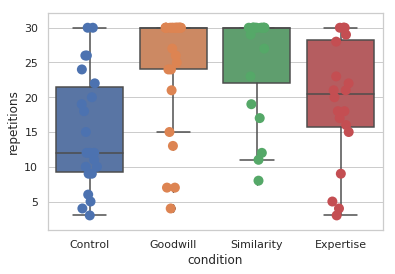

In [51]:
sns.boxplot(data=df,x="condition", y="repetitions")
sns.stripplot(data=df,x="condition", y="repetitions",size=10)

/home/s-lemaignan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


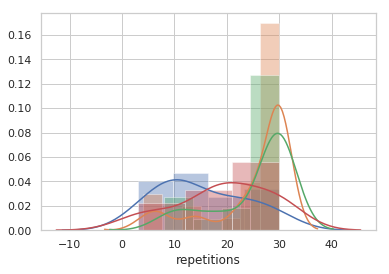

In [56]:
sns.distplot(df[df.condition=="Control"]["repetitions"])
sns.distplot(df[df.condition=="Goodwill"]["repetitions"])
sns.distplot(df[df.condition=="Similarity"]["repetitions"])
sns.distplot(df[df.condition=="Expertise"]["repetitions"])

In [59]:
ttest_ind(df[df.condition=="Control"].repetitions, df[df.condition=="Expertise"].repetitions)

Ttest_indResult(statistic=-1.616083168428035, pvalue=0.11393732292717891)

In [61]:
ttest_ind(df[df.condition=="Control"].repetitions, df[df.condition=="Goodwill"].repetitions)

Ttest_indResult(statistic=-4.106192192069859, pvalue=0.00015923825697069873)

In [62]:
ttest_ind(df[df.condition=="Control"].repetitions, df[df.condition=="Similarity"].repetitions)

Ttest_indResult(statistic=-4.1130444932836925, pvalue=0.00018887852190108234)

Is there a correlation between #repetitions and exercice time?

/home/s-lemaignan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


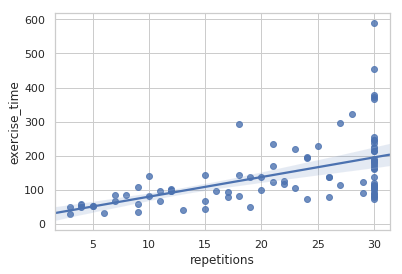

In [49]:
sns.regplot(df.repetitions, df.exercise_time)


In [50]:
pearsonr(df.repetitions, df.exercise_time)

(0.5368277680289253, 5.858200209382124e-08)

/home/s-lemaignan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


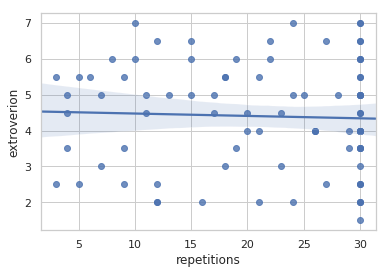

In [65]:
sns.regplot(df.repetitions, df.extroverion)

In [66]:
pearsonr(df.repetitions, df.extroverion)

(-0.04160155051183218, 0.6986912495876415)